# CS-E4740  FL Flavors 

# Coding Assignment for the Quiz "FL Flavors" 



Consider four data scientists: Emily, Helene, Anika and Isabella. Each of them has collected a local dataset which consists of several data points. Each data point is characterized by two numeric features x1 and x2 and a numeric label y. The data scientists had only access to one of the two features. 

The local datasets are stored in csv files, one such file for each data scientist. Missing feature values are indicated by the text "missing". 

Your task is to: 

* Read in the local datasets and replace missing feature values by the numeric value 0. 
* Each local dataset results in a numpy array `X` of shape (m,2) where m is the number of data points in the local dataset. The first column `X[:,0]` holds the feature values of `x1` (which is `0` if the feature value is missing) and the second column `X[:,1]` holds the values of feature `x2` (which is `0` if the feature value is missing). 
* Each local dataset results also in a numpy array `y` of shape (m,1) which hold the label values of the data points in the local dataset. 
* Create a networkx grap `G` with four nodes with attributes `X` and `y` being the numpy arrays generated above.
* Add two edges to the graph `G`. 
* Use the ready-made function `FedSGD` (which implements the FedSGD algorithm from Section 9 in the lecture notes) to learn, for each node `i`, the weights $w^{(i)}_{1},w^{(i)}_{2}$ of a linear hypothesis map  
$$h (\mathbf{x}) = w^{(i)}_{1} x_{1} + w^{(i)}_{2} x_{2}$$
that allows to predict the label of a data point with minimum squared error loss. 
* For the each local dataset, store the learnt weigts in an attribute "w" of the corresponding node in `G` (each node in `G` corresponds to one data scientist and its local dataset). The attribute "w" is a numpy array of shape `(2,)` with the first entry being $w^{(i)}_{1}$ and the second entry being $w^{(i)}_{2}$. 


In [1]:
import networkx as nx 
import pandas as pd 

Gin = nx.Graph()

datascientist = "Helene"
filename = "https://raw.githubusercontent.com/alexjungaalto/FederatedLearning/main/material/QuizFLFlavors/localdataset"+datascientist 
df0=pd.read_csv(filename)  
df0=df0.replace('missing',0)

Gin.add_node(0) 
Gin.nodes[0]['name'] = datascientist
Gin.nodes[0]['X'] = df0[["x1","x2"]].to_numpy()
Gin.nodes[0]['y'] = df0["y"].to_numpy().reshape(-1,1)

datascientist = "Isabella"
filename = "https://raw.githubusercontent.com/alexjungaalto/FederatedLearning/main/material/QuizFLFlavors/localdataset"+datascientist 
df1 =pd.read_csv(filename)  
df1=df1.replace('missing',0)

Gin.add_node(1) 
Gin.nodes[1]['name'] = datascientist
Gin.nodes[1]['X'] = df1[["x1","x2"]].to_numpy()
Gin.nodes[1]['y'] = df1["y"].to_numpy().reshape(-1,1)

datascientist = "Anika"
filename = "https://raw.githubusercontent.com/alexjungaalto/FederatedLearning/main/material/QuizFLFlavors/localdataset"+datascientist 
df2 =pd.read_csv(filename)  
df2=df2.replace('missing',0)

Gin.add_node(2) 
Gin.nodes[2]['name'] = datascientist
Gin.nodes[2]['X'] = df2[["x1","x2"]].to_numpy()
Gin.nodes[2]['y'] = df2["y"].to_numpy().reshape(-1,1)

datascientist = "Emily"
filename = "https://raw.githubusercontent.com/alexjungaalto/FederatedLearning/main/material/QuizFLFlavors/localdataset"+datascientist 
df3 =pd.read_csv(filename)  
df3=df3.replace('missing',0)

Gin.add_node(3) 
Gin.nodes[3]['name'] = datascientist
Gin.nodes[3]['X'] = df3[["x1","x2"]].to_numpy()
Gin.nodes[3]['y'] = df3["y"].to_numpy().reshape(-1,1)

In [2]:
# input: 
# - graph: networkx.Graph() whose nodes have attributes 
#         -- "X": feature matrix X^{(i)} with feature vectors in its colunms 
#         -- "y": label vector y^{(i)} with labels of data points in local dataset
#        .edges() are undirected and assumed to have unit weight (A_{i,j} = 1 for all edges)
# - lrate: learningrate used for the gradientsteps 
# - regparam: regularization parameter that scaled the GTV term 
# - maxiter: maximum number of gradient steps. 
#output: 
#  - graph node attribute "w" which holds the weights w^{(i)} 
#

def FedSGD(Gin,lrate=0.01,regparam=0,maxiter=100):
# init model parmas (weights of linear maps) to zero 

    for node_i in Gin.nodes(data=False): 
        # determine number of features used to characterize data points 
        # this nr. of features is equal to the length of the weight vector
        nrfeatures = Gin.nodes[node_i]["X"].shape[1]
        Gin.nodes[node_i]["w"] = np.zeros((nrfeatures,1))

    for iter_GD in range(maxiter):

    # the following "for loop" computes the local gradient at each node 
        for node_i in Gin.nodes(data=False):
            tmp_y = Gin.nodes[node_i]["y"].reshape(-1,1)
            tmp_X = Gin.nodes[node_i]["X"]
            localsamplesize = tmp_X.shape[0]
            currw = Gin.nodes[node_i]["w"]
            tmp_vec = np.zeros(currw.shape)
            for node_j in Gin[node_i]: 
                tmp_vec += (currw - Gin.nodes[node_j]["w"])
        
            update = (1/localsamplesize)*tmp_X.T.dot(tmp_y-tmp_X.dot(currw))-regparam*tmp_vec  
            # we need to store the updated weights in a dummy attribute 
            # as we need to use current weights for the updates of other nodes 
            Gin.nodes[node_i]["w_new"] = Gin.nodes[node_i]["w"]+2*lrate*update
        for node_i in Gin.nodes(data=False): 
             Gin.nodes[node_i]["w"] =  Gin.nodes[node_i]["w_new"]

It is always a good idea to try to visualize the data at hand. The code snippet below generates a scatter plot for each local dataset, using the features x1 and x2 (possibly replaced by 0 values) as coordinates. 

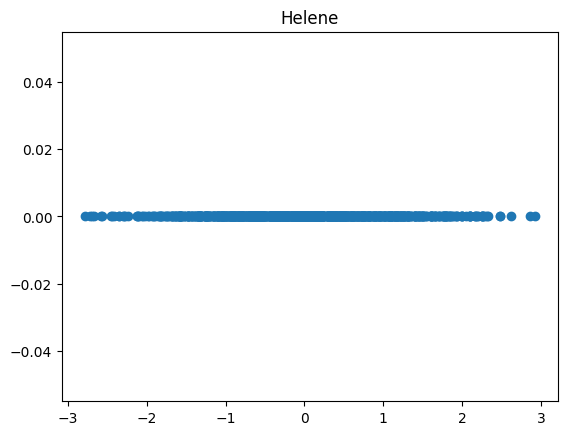

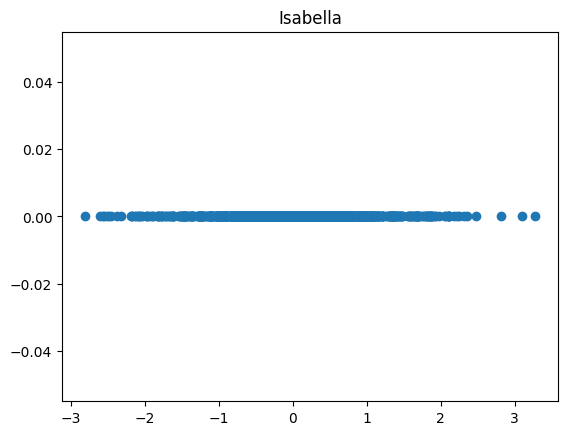

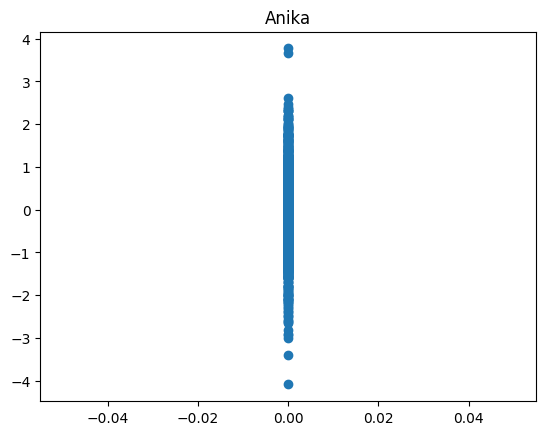

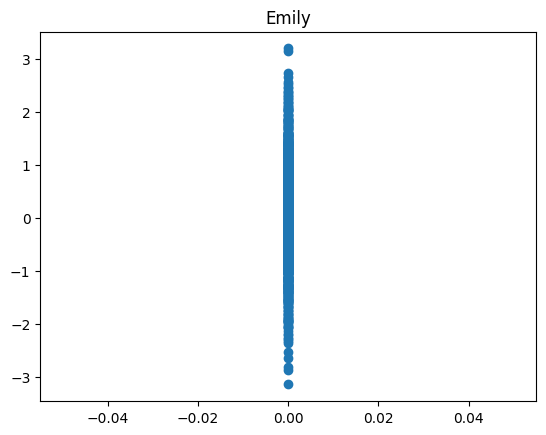

In [3]:
import matplotlib.pyplot as plt
import numpy as np 

for iter_node in Gin.nodes(): 
    tmp = Gin.nodes[iter_node]['X']
    plt.scatter(tmp[:,0],tmp[:,1])
    plt.title(Gin.nodes[iter_node]["name"])
    plt.show()


In [4]:
# You have to use FedSGD to learn weights for a linear hypothesis map for each node/local dataset

# FedSGD(Gin,lrate=0.01,regparam=1,maxiter=1000)


In [5]:
Gin.add_edge(0,1)
Gin.add_edge(2,3)

In [6]:
FedSGD(Gin,lrate=0.01,regparam=1,maxiter=1000)

In [7]:
for node_i in Gin.nodes(data=False): 
    weights=Gin.nodes[node_i]["w"] #weights
    print(Gin.nodes[node_i]['name'])
    print(weights)
    
    X=Gin.nodes[node_i]['X'] #data points
    Y_pred=np.dot(X, weights) #predicted labels
    
    Y_true=Gin.nodes[node_i]['y'] #true labels
    MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
    print(MSE)
    
    print("\n")
    
Gin.remove_edges_from([(0, 1), (2, 3)])


Helene
[[-4.70942813]
 [ 0.        ]]
38.77083117208549


Isabella
[[-1.13558036]
 [ 0.        ]]
19.360924758058346


Anika
[[0.        ]
 [0.48414474]]
14.502318221696477


Emily
[[0.        ]
 [2.92039076]]
72.63526146093736




In [8]:
#Different edges configuration
Gin.add_edge(0,2)
Gin.add_edge(1,3)
FedSGD(Gin,lrate=0.01,regparam=1,maxiter=1000)
for node_i in Gin.nodes(data=False): 
    weights=Gin.nodes[node_i]["w"] #weights
    print(Gin.nodes[node_i]['name'])
    print(weights)
    
    X=Gin.nodes[node_i]['X'] #data points
    Y_pred=np.dot(X, weights) #predicted labels
    
    Y_true=Gin.nodes[node_i]['y'] #true labels
    MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
    print(MSE)
    
    print("\n")
Gin.remove_edges_from([(0, 2), (1, 3)])

Helene
[[-8.15218879]
 [-1.83663427]]
26.459024737965265


Isabella
[[2.88691339]
 [5.34037306]]
4.978203567364909


Anika
[[-8.15076089]
 [-1.83693851]]
8.846455289180888


Emily
[[2.88586769]
 [5.34146049]]
66.73268415926317




In [9]:
#Different edges configuration
Gin.add_edge(0,3)
Gin.add_edge(1,2)
FedSGD(Gin,lrate=0.01,regparam=1,maxiter=1000)
for node_i in Gin.nodes(data=False): 
    weights=Gin.nodes[node_i]["w"] #weights
    print(Gin.nodes[node_i]['name'])
    print(weights)
    
    X=Gin.nodes[node_i]['X'] #data points
    Y_pred=np.dot(X, weights) #predicted labels
    
    Y_true=Gin.nodes[node_i]['y'] #true labels
    MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
    print(MSE)
    
    print("\n")
Gin.remove_edges_from([(0, 3), (1, 2)])

Helene
[[-8.15218879]
 [ 5.34037306]]
26.459024737965265


Isabella
[[ 2.88691339]
 [-1.83663427]]
4.978203567364909


Anika
[[ 2.88586769]
 [-1.83693851]]
8.846455289180888


Emily
[[-8.15076089]
 [ 5.34146049]]
66.73268415926317




In [10]:
#Different edges configuration
Gin.add_edge(1,2)
Gin.add_edge(0,3)
FedSGD(Gin,lrate=0.01,regparam=1,maxiter=1000)
for node_i in Gin.nodes(data=False): 
    weights=Gin.nodes[node_i]["w"] #weights
    print(Gin.nodes[node_i]['name'])
    print(weights)
    
    X=Gin.nodes[node_i]['X'] #data points
    Y_pred=np.dot(X, weights) #predicted labels
    
    Y_true=Gin.nodes[node_i]['y'] #true labels
    MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
    print(MSE)
    
    print("\n")
Gin.remove_edges_from([(1, 2), (0, 3)])

Helene
[[-8.15218879]
 [ 5.34037306]]
26.459024737965265


Isabella
[[ 2.88691339]
 [-1.83663427]]
4.978203567364909


Anika
[[ 2.88586769]
 [-1.83693851]]
8.846455289180888


Emily
[[-8.15076089]
 [ 5.34146049]]
66.73268415926317




In [11]:
#Different edges configuration
Gin.add_edge(1,3)
Gin.add_edge(0,2)
FedSGD(Gin,lrate=0.01,regparam=1,maxiter=1000)
for node_i in Gin.nodes(data=False): 
    weights=Gin.nodes[node_i]["w"] #weights
    print(Gin.nodes[node_i]['name'])
    print(weights)
    
    X=Gin.nodes[node_i]['X'] #data points
    Y_pred=np.dot(X, weights) #predicted labels
    
    Y_true=Gin.nodes[node_i]['y'] #true labels
    MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
    print(MSE)
    
    print("\n")
Gin.remove_edges_from([(1, 3), (0, 2)])

Helene
[[-8.15218879]
 [-1.83663427]]
26.459024737965265


Isabella
[[2.88691339]
 [5.34037306]]
4.978203567364909


Anika
[[-8.15076089]
 [-1.83693851]]
8.846455289180888


Emily
[[2.88586769]
 [5.34146049]]
66.73268415926317




In [12]:
#Different edges configuration
Gin.add_edge(2,3)
Gin.add_edge(0,1)
FedSGD(Gin,lrate=0.01,regparam=1,maxiter=1000)
for node_i in Gin.nodes(data=False): 
    weights=Gin.nodes[node_i]["w"] #weights
    print(Gin.nodes[node_i]['name'])
    print(weights)
    
    X=Gin.nodes[node_i]['X'] #data points
    Y_pred=np.dot(X, weights) #predicted labels
    
    Y_true=Gin.nodes[node_i]['y'] #true labels
    MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
    print(MSE)
    
    print("\n")
Gin.remove_edges_from([(2, 3), (0, 1)])

Helene
[[-4.70942813]
 [ 0.        ]]
38.77083117208549


Isabella
[[-1.13558036]
 [ 0.        ]]
19.360924758058346


Anika
[[0.        ]
 [0.48414474]]
14.502318221696477


Emily
[[0.        ]
 [2.92039076]]
72.63526146093736




In [13]:
#training independently on local dataset
from sklearn.linear_model import LinearRegression

for node_i in Gin.nodes(data=False): 
    
    print(Gin.nodes[node_i]['name'])
    
    
    X=Gin.nodes[node_i]['X'] #data points
    Y_true=Gin.nodes[node_i]['y'] #true labels
        
    reg = LinearRegression().fit(X, Y_true)
    Y_pred=reg.predict(X) #predicted labels
    
    
    
    MSE = np.square(np.subtract(Y_true,Y_pred)).mean()
    print(MSE)

Helene
26.397542587018346
Isabella
4.973069869839388
Anika
8.846371377069406
Emily
66.72308812675512
